# Introduction

My name is Hilman Hibabullah, i'm student Data Science Batch05 from Hactive8

In this project i want to make a NLP model, data set https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

# Import library

In [1]:
import numpy as np 
import pandas as pd

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#For text preprocessing
import re
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#For creating the neural network model
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


import warnings
warnings.filterwarnings('ignore')

# Data Loading

## Indonesian Hate & Abusive Text

In [2]:
data = pd.read_csv('data.csv', encoding='latin-1')
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
data.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

there's no missing value in this data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [5]:
# cek data duplicate

print("duplicate data : ", data.duplicated().sum())

duplicate data :  125


In [6]:
# drop duplicated data
data = data.drop_duplicates()

## Alay Indonesia Dictionary

This alay data is for preprocessing Indonesian Tweet data

In [7]:
alay = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [8]:
alay = alay.rename(columns={0: 'slang', 1: 'formal'})
alay

,slang,formal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [9]:
alay[alay['slang'] == 'gblk']

,slang,formal
13128,gblk,goblok


# Cleaning Data

Let's see which tweet contain a hate speech and abbusive words

In [10]:
data[(data['Abusive'] ==1)]

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13161,brengsek itu orang terbuat dr apa bikin gue be...,1,1,1,0,0,0,0,0,1,1,0,0
13162,Kapolda Babi! Biadap dan Bodoh! Gak punya otak...,1,1,0,1,0,0,0,0,1,0,1,0
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0


there's only 3295 data, so i prefer to know that tweet is contain hate speech

In [11]:
# Make a new dataset

hate = data[['Tweet', 'HS']].copy()
hate

,Tweet,HS
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1
13165,USER Kasur mana enak kunyuk',0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0
13167,USER USER USER USER Bom yang real mudah terdet...,0


In [12]:
hate.shape

(13044, 2)

this is data that i will take to the NLP Model, it have 13169 rows and 2 columns

# Exploration Data & Data Preprocessing

## Sample data preprocesing

In [13]:
sample_text = hate.loc[13000]['Tweet']

print(sample_text)

disini sinyal simpati kacrut abissss parah mau nyetriming suliddddd'


In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# Word Tokenization
from nltk.tokenize import word_tokenize
word_token = word_tokenize(sample_text)

print(word_token)

['disini', 'sinyal', 'simpati', 'kacrut', 'abissss', 'parah', 'mau', 'nyetriming', 'suliddddd', "'"]


In [16]:
# Frequency Distribution
from nltk.probability import FreqDist

fdist = FreqDist(word_token)
fdist.most_common(4)

[('disini', 1), ('sinyal', 1), ('simpati', 1), ('kacrut', 1)]

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))
print(stop_words)

{'ialah', 'antaranya', 'mirip', 'belakangan', 'seluruhnya', 'dirinya', 'bagian', 'dimaksudnya', 'meski', 'menandaskan', 'didatangkan', 'tuturnya', 'bertanya', 'sesuatunya', 'demi', 'diperbuatnya', 'begitu', 'diibaratkannya', 'lanjutnya', 'mengucapkannya', 'sekitar', 'diibaratkan', 'menurut', 'usai', 'semakin', 'wahai', 'sekalian', 'sekali-kali', 'agak', 'semua', 'bagi', 'karena', 'sebutnya', 'sekarang', 'kedua', 'merupakan', 'seorang', 'untuk', 'berakhirlah', 'kemungkinannya', 'nyatanya', 'sudahlah', 'begitupun', 'memberikan', 'haruslah', 'seolah', 'tidakkah', 'apa', 'sesampai', 'dipergunakan', 'diungkapkan', 'begitulah', 'maka', 'ikut', 'kelihatannya', 'apaan', 'atau', 'berakhir', 'meyakinkan', 'diucapkannya', 'kamu', 'kemungkinan', 'sebenarnya', 'terjadilah', 'mengucapkan', 'sejak', 'bahkan', 'setelah', 'sekalipun', 'jangankan', 'kan', 'lebih', 'dong', 'amatlah', 'meskipun', 'yang', 'jelasnya', 'di', 'kala', 'segala', 'melalui', 'diperlukannya', 'diakhirinya', 'sementara', 'sini', 'b

In [19]:
sent_filtered = []

for w in word_token:
    if w not in stop_words:
        sent_filtered.append(w)
        
print("Tokenized Sentence:", word_token)
print("Filterd Sentence:", sent_filtered)

Tokenized Sentence: ['disini', 'sinyal', 'simpati', 'kacrut', 'abissss', 'parah', 'mau', 'nyetriming', 'suliddddd', "'"]
Filterd Sentence: ['sinyal', 'simpati', 'kacrut', 'abissss', 'parah', 'nyetriming', 'suliddddd', "'"]


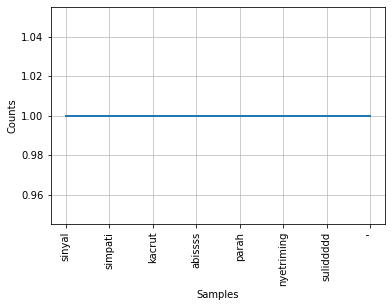

In [20]:
fdist = FreqDist(sent_filtered)

fdist.plot(30, cumulative=False)
plt.show()

In [21]:
# Lexicon Normalization

# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words = []
for w in sent_filtered:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:", sent_filtered)
print("Stemmed Sentence:", stemmed_words)

Filtered Sentence: ['sinyal', 'simpati', 'kacrut', 'abissss', 'parah', 'nyetriming', 'suliddddd', "'"]
Stemmed Sentence: ['sinyal', 'simpati', 'kacrut', 'abissss', 'parah', 'nyetrim', 'suliddddd', "'"]


In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
# Performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lemmatized_words = []

for w in sent_filtered:
    lemmatized_words.append(lem.lemmatize(w))
    
print("Filtered Sentence:", sent_filtered)
print("Lemmatized Sentence:", lemmatized_words)

Filtered Sentence: ['sinyal', 'simpati', 'kacrut', 'abissss', 'parah', 'nyetriming', 'suliddddd', "'"]
Lemmatized Sentence: ['sinyal', 'simpati', 'kacrut', 'abissss', 'parah', 'nyetriming', 'suliddddd', "'"]


In [24]:
hate.reset_index(inplace=True)

In [25]:
hate

,index,Tweet,HS
0,0,- disaat semua cowok berusaha melacak perhatia...,1
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,0
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,4,USER USER Kaum cebong kapir udah keliatan dong...,1
...,...,...,...
13039,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1
13040,13165,USER Kasur mana enak kunyuk',0
13041,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0
13042,13167,USER USER USER USER Bom yang real mudah terdet...,0


## Hate Dataset EDA 

In [26]:
# Stopwords
hate['stopwords'] = hate['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
hate[['Tweet','stopwords']].head()

,Tweet,stopwords
0,- disaat semua cowok berusaha melacak perhatia...,2
1,RT USER: USER siapa yang telat ngasih tau elu?...,5
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",16
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,4


In [27]:
# Hastag
hate['hastags'] = hate['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
hate[['Tweet','hastags']]

,Tweet,hastags
0,- disaat semua cowok berusaha melacak perhatia...,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,0
...,...,...
13039,USER jangan asal ngomong ndasmu. congor lu yg ...,0
13040,USER Kasur mana enak kunyuk',0
13041,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0
13042,USER USER USER USER Bom yang real mudah terdet...,0


In [28]:
# Numbers / Digits
hate['numerics'] = hate['Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
hate[['Tweet','numerics']]

,Tweet,numerics
0,- disaat semua cowok berusaha melacak perhatia...,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,0
...,...,...
13039,USER jangan asal ngomong ndasmu. congor lu yg ...,0
13040,USER Kasur mana enak kunyuk',0
13041,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0
13042,USER USER USER USER Bom yang real mudah terdet...,0


In [29]:
# Number of Words
hate['word_count'] = hate['Tweet'].apply(lambda x: len(str(x).split(" ")))
hate[['Tweet','word_count']]

,Tweet,word_count
0,- disaat semua cowok berusaha melacak perhatia...,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,14
4,USER USER Kaum cebong kapir udah keliatan dong...,14
...,...,...
13039,USER jangan asal ngomong ndasmu. congor lu yg ...,10
13040,USER Kasur mana enak kunyuk',5
13041,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,9
13042,USER USER USER USER Bom yang real mudah terdet...,22


In [30]:
# Number of Character
hate['char_count'] = hate['Tweet'].str.len()
hate[['Tweet','char_count']].head()

,Tweet,char_count
0,- disaat semua cowok berusaha melacak perhatia...,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75
4,USER USER Kaum cebong kapir udah keliatan dong...,89


In [31]:
# Punctuation
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

hate['punctuation'] = hate['Tweet'].apply(lambda x: count_punct(x))
hate[['Tweet','punctuation']].head()

,Tweet,punctuation
0,- disaat semua cowok berusaha melacak perhatia...,7
1,RT USER: USER siapa yang telat ngasih tau elu?...,3
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",7
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,3
4,USER USER Kaum cebong kapir udah keliatan dong...,1


In [32]:
print("Shape: ", hate.shape)
hate.head(10)

Shape:  (13044, 9)


,index,Tweet,HS,stopwords,hastags,numerics,word_count,char_count,punctuation
0,0,- disaat semua cowok berusaha melacak perhatia...,1,2,0,0,25,138,7
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,0,5,0,0,21,120,3
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,16,0,0,37,254,7
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,14,75,3
4,4,USER USER Kaum cebong kapir udah keliatan dong...,1,4,0,0,14,89,1
5,5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,0,0,0,6,73,13
6,6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,1,0,1,11,64,0
7,7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,2,0,1,20,129,6
8,8,Nah admin belanja satu lagi port terbaik nak m...,0,3,0,1,42,231,16
9,9,USER Enak lg klo smbil ngewe',0,0,0,0,6,29,1


<AxesSubplot:xlabel='stopwords', ylabel='Density'>

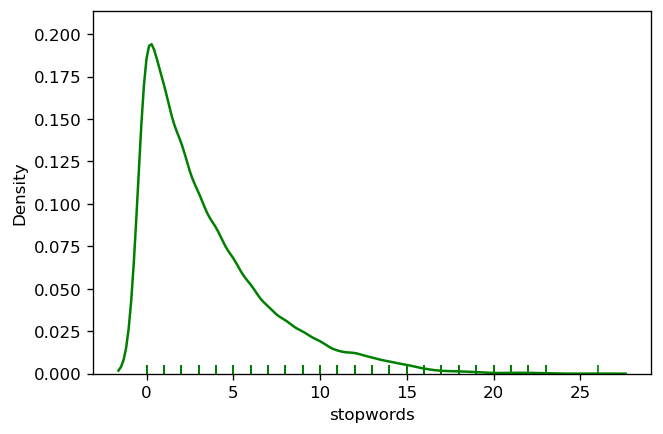

In [33]:
# Distribution of stopwords values
figure(dpi = 120)
sns.distplot(hate.stopwords, rug=True, hist=False, color = 'green')

In [34]:
hate.loc[hate.stopwords >= 15].Tweet

2        41. Kadang aku berfikir, kenapa aku tetap perc...
139      Aku bertanya tujuan pada hati\nLogikaku yg men...
321      Debat Publik bukan ajang pembuktian siapa pint...
416      USER Risa baru saja pulang dari pelatihan khus...
427      USER Atau seperti hujan lebat dari langit, ber...
                               ...                        
12735    Selalu tak pernah ada bukti atas tuduhan sebag...
12745    Dia memang tidak punya hak untuk berkata seper...
12958    Kesimpulan; ; Suatu penjajahan sejarah tidak k...
12984    Akhirnya saya paham bahwa HTI menggunakan Ideo...
13038    Orang Yahudi, Kristen dan Muslim yang belum pe...
Name: Tweet, Length: 177, dtype: object

In [35]:
sample_text = hate.loc[12856]['Tweet']
print(sample_text)

THR GAJI TIGEBELAS HEBOH MACAM IKLAN, (SOPOI LOK) SEKALI BBM NAEK SENYAP HAMPIR TAK KEDENGARAN TANPA SUARA\n\nINGAT.... AMBIL UANG NYA, GANTI PRESIDEN NYA \xf0\x9f\x98\x81\xf0\x9f\x98\x81\xf0\x9f\x98\x81\n\n#2019 GANTI PRESIDENT'


In [36]:
sample_text2 = hate.loc[439]['Tweet']
print(sample_text2)

Celeng nya bang acon susah bgt dah \xf0\x9f\x98\xa


<AxesSubplot:xlabel='word_count', ylabel='Density'>

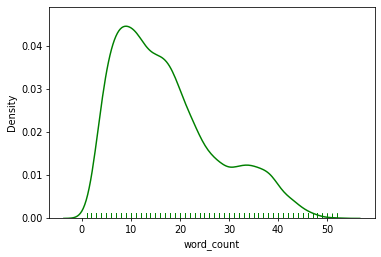

In [37]:
# Distribution of word_count values
figure(dpi = 70)
sns.distplot(hate.word_count, rug=True, hist=False, color = 'green')

<AxesSubplot:xlabel='char_count', ylabel='Density'>

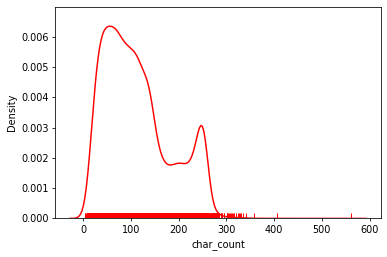

In [38]:
# Distribution of char_count values
figure(dpi = 70)
sns.distplot(hate.char_count, rug=True, hist=False, color = 'red')

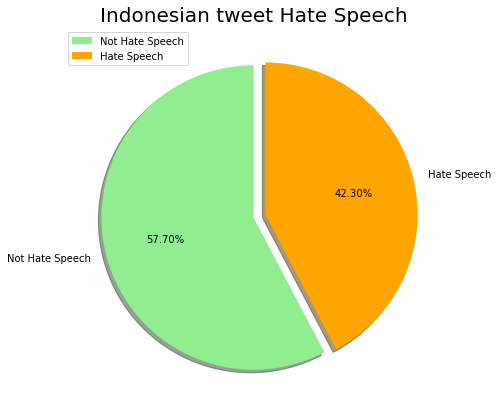

In [39]:
# Melihat komposisi target

labels = ['Not Hate Speech', 'Hate Speech']
size = hate['HS'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.08]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Indonesian tweet Hate Speech', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

we can see in pie chart that from 13169 tweets from Indonesian citizen, there's a 42.23% tweet is contain a hate speech, it's around 5561 tweets, which means Indonesian citizen ar so inpolite an have a bad attitude in media social

In [40]:
hate.loc[hate.HS == 1].Tweet.sample(5)

4149    apalagi jika ditambah dengan promosi nikah mud...
3642    Anda sudah tahu Kebajikan Khonghucu Pak Lukman...
7262    Polri Benarkan Tangkap Prabowo atas Kasus Peng...
6923    Kenapa sih tuh...\nBani taplak di Kalimantan B...
7345    USER USER USER USER Cebong kalau ketahuan tolo...
Name: Tweet, dtype: object

In [41]:
hs = hate.loc[5822]['Tweet']
print(hs)

Mbah Soleh :" 2018, IMF Pertahankan Perkiraan Pertumbuhan Ekonomi Global 3,9%: Washington: Dana Moneter Internasional atau Internationalâ?¦


In [42]:
hate.loc[hate.HS == 0].Tweet.sample(5)

8759     mereka yang nuduh Jokowi anti ulama (versi mer...
5416     RT USER: USER USER USER USER USER USER USER US...
7628     noona aku pulang /teriak/ noona dimana?/nginti...
4094     Mendampingi Presiden Joko Widodo bertemu denga...
10230              URL &lt;-pacar lesbi #xxx #porn #bokep'
Name: Tweet, dtype: object

In [43]:
no_hs = hate.loc[6130]['Tweet']
print(no_hs)

USER Saya percaya kpk. Saya ga percaya sby dan demokrat. Demokrat katakan tidak pada(hal) korupsi.


In [44]:
text_cloud = " ".join(x for x in hate['Tweet'].head(100000))
print ("There are {} words in the combination of all tweets.".format(len(text_cloud)))

There are 1501681 words in the combination of all tweets.


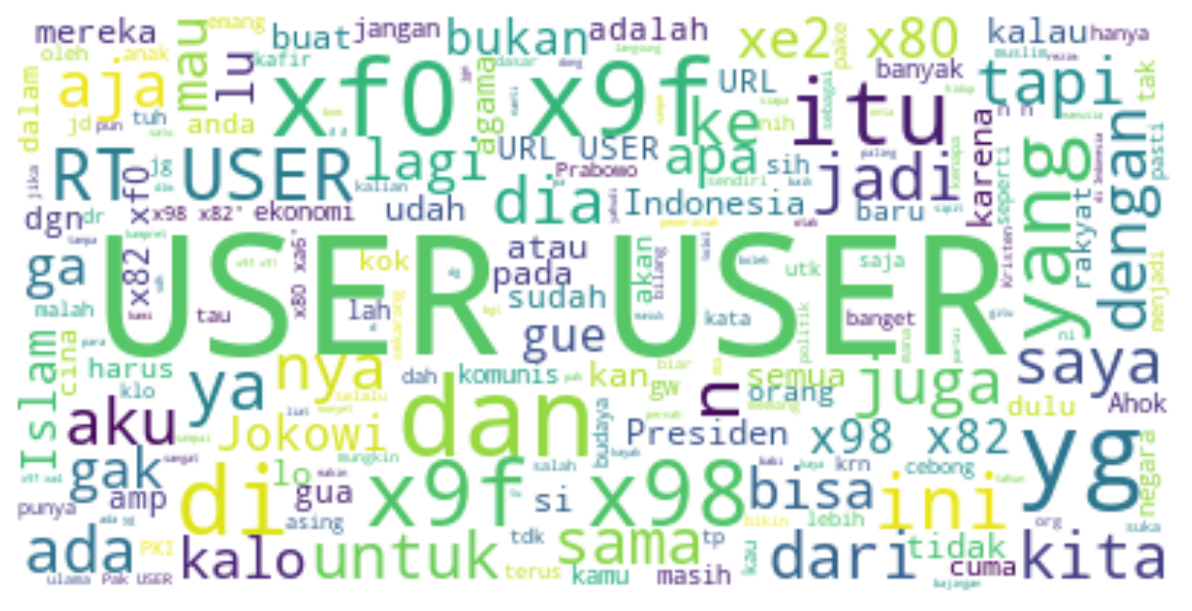

In [45]:
# stoprowd wordcloud

stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (10,10), dpi= 150)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

as we can see from wordcloud there's a suspicious word like xfo, x9f, x98, user where's still mention because it wasn't have preprocessing. so we must preprocess first

In [46]:
# See sample text

import random
random_index = random.randint(0, len(hate) - 5)
for row in hate[["Tweet", "HS"]][random_index:random_index + 5].itertuples():
  _, text, target = row
  if target == 0:
    print(f"Target: {target} (Not Hate Speech)")
  else:
    print(f"Target: {target} (Hate Speech)")
  print(f"Teks: {text}\n")
  print("---\n")

Target: 1 (Hate Speech)
Teks: Orang-orang kayak gini pantes dilaknat tangisan rakyat dari masa prakemerdekaan sampe kiamat nanti dan digentayangin arwah pejuang yang kegelisahannya masih lebih militan daripada mereka yang kerjaannya cuma ngawang, kosong, bolot.'

---

Target: 0 (Not Hate Speech)
Teks: Nyolok headset ke hp ternyata ga kecolok dalem...\n\nKampret.\xf0\x9f\x98\x82\xf0\x9f\x98\x82'

---

Target: 1 (Hate Speech)
Teks: Ini anak aslinya geblek apa gimana ya? Tp likeable \xe2\x9d\xa4\xe2\x9d\xa4\xe2\x9d\xa4'

---

Target: 0 (Not Hate Speech)
Teks: USER USER Alhamdulillah 73 taun Indonesia Merdeka urang Jabar gaduh Bandara Internasional, Hatur nuhun Bapak Presiden USER ; Sing dipasihan sehat sinareng kakiatan kangge janten pemimpin 2periode, mugi dikobul ku Alloh, amin YRA

---

Target: 1 (Hate Speech)
Teks: Andai ahok masih jadi gubernur sudah ditutup itu rumah sakit URL

---



In [47]:
hate_new = hate.copy()

## Hate Dataset Preprocessing

In [48]:
# Indonesian stopwords

ind_stopwords = pd.DataFrame(stop_words, columns=['word'])
ind_stopwords

,word
0,ialah
1,antaranya
2,mirip
3,belakangan
4,seluruhnya
...,...
752,adapun
753,menunjukkan
754,toh
755,menanti


In [49]:
ind_stopwords[ind_stopwords['word'] == 'nya']

,word


In [50]:
alay

,slang,formal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [51]:
alay[alay['slang'] == 'nya']

,slang,formal


In [52]:
# Make function to preproces

def clean(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub(r'@[A-Za-z0-9]+', '',text) #mention
    text = re.sub(r'#', '', text) #removed mention
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('pic.twitter.com.[\w]+', '', text) # Remove every pic 
    text = re.sub('[^\x00-\x7F]+',' ', text)
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", text).split())
    text = re.sub('((xf0|x9f|x98|x9f|x82|xe2|x80|x84|x86|x81|xa6|xa4|x91|x8d|xad))',' ', text) # remove suspicious word, it hink it's an emoticons
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('url','www.',text) # Sub url to www
    return text


alay_dict = dict(zip(alay['slang'], alay['formal']))

def normalize_alay(text):
    return ' '.join([alay_dict[word] if word in alay_dict else word for word in text.split(' ')])
    return text

def lower(text):
    return text.lower()

def stopword(text):
    text = ' '.join(['' if word in ind_stopwords.word.values else word for word in text.split(' ')])
    return text

def punc_space(text):
    text = text.strip()
    text = text.translate(str.maketrans("","", string.punctuation)) # remove punctuation
    text = re.sub('www', ' ', text)
    return text

In [53]:
# make a simple function to preproces

def preprocess(text):
    text = lower(text)
    text = clean(text)
    text = normalize_alay(text)
    text = stopword(text)
    text = punc_space(text)
    return text

print('preprocess:', preprocess(' https://twitter.com/home @Hilman bacot kamu dasar manusia muka 12, rt user untung.... ?:> gue dan dia udah tenang!!! xf0 x84 www.picthoax'))

preprocess: bacot  dasar manusia muka 12   untung gue    tenang


In [54]:
# Apply function to hate dataset

hate_new['Tweet'] = hate_new['Tweet'].apply(preprocess)
hate_new['Tweet']

0        cowok berusaha melacak perhatian gue  lantas r...
1        telat  tau  edan sarap gue bergaul  cigax jifl...
2        41 kadang  berpikir    percaya  tuhan    jatuh...
3                                      ku tau matamu sipit
4             kaum cebong kafir   dongoknya    dungu  haha
                               ...                        
13039             berbicara ndasmu congor   sekata  anjing
13040                                   kasur  enak kunyuk
13041                hati hati bisu    bosan duh       xaa
13042    bom  real mudah terdeteksi bom  terkubur    da...
13043                           situ    foto ya kutil onta
Name: Tweet, Length: 13044, dtype: object

In [55]:
text_cloud_clean = " ".join(x for x in hate_new['Tweet'].head(1000000))
print ("There are {} words in the combination of all tweets.".format(len(text_cloud_clean)))

There are 1087222 words in the combination of all tweets.


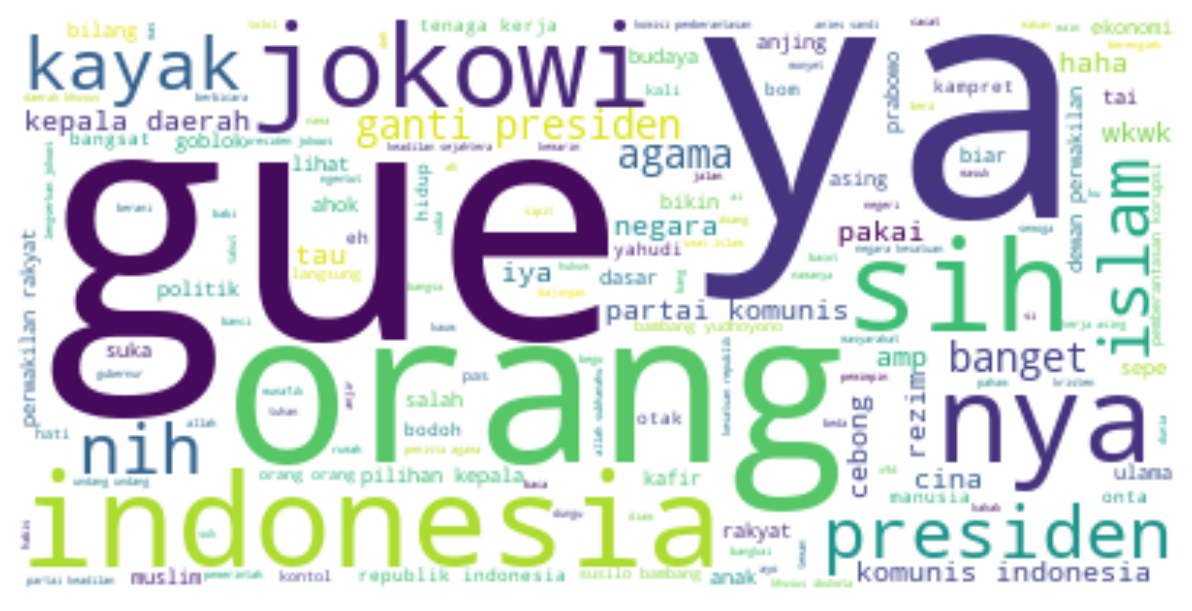

In [56]:
# Generate a word cloud image

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_cloud_clean)

# Display the generated image:
# the matplotlib way:
figure(figsize= (10,10), dpi= 150)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

from this wordcloud we can see the different after i do the preprocessing things, most of unnecessary word in Indonesian word it dont exist anymore

we can see the most word used by Indonesian citizen in this dataset is gue, ya, orang, and some other word to use is like presiden, Indonesia, jolowi, presiden, cebong, komunis, partai, agama. it means this word is most frequency used for Indonesian citizen

let's check hate_new dataset, because i've done the preprocessing

In [57]:
# Stopwords
hate_new['stopwords'] = hate_new['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
hate_new[['Tweet','stopwords']].head()

,Tweet,stopwords
0,cowok berusaha melacak perhatian gue lantas r...,0
1,telat tau edan sarap gue bergaul cigax jifl...,0
2,41 kadang berpikir percaya tuhan jatuh...,0
3,ku tau matamu sipit,0
4,kaum cebong kafir dongoknya dungu haha,0


In [58]:
# Hastag
hate_new['hastags'] = hate_new['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
hate_new[['Tweet','hastags']]


,Tweet,hastags
0,cowok berusaha melacak perhatian gue lantas r...,0
1,telat tau edan sarap gue bergaul cigax jifl...,0
2,41 kadang berpikir percaya tuhan jatuh...,0
3,ku tau matamu sipit,0
4,kaum cebong kafir dongoknya dungu haha,0
...,...,...
13039,berbicara ndasmu congor sekata anjing,0
13040,kasur enak kunyuk,0
13041,hati hati bisu bosan duh xaa,0
13042,bom real mudah terdeteksi bom terkubur da...,0


In [59]:
# Numbers / Digits
hate_new['numerics'] = hate_new['Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
hate_new[['Tweet','numerics']]


,Tweet,numerics
0,cowok berusaha melacak perhatian gue lantas r...,0
1,telat tau edan sarap gue bergaul cigax jifl...,0
2,41 kadang berpikir percaya tuhan jatuh...,1
3,ku tau matamu sipit,0
4,kaum cebong kafir dongoknya dungu haha,0
...,...,...
13039,berbicara ndasmu congor sekata anjing,0
13040,kasur enak kunyuk,0
13041,hati hati bisu bosan duh xaa,0
13042,bom real mudah terdeteksi bom terkubur da...,0


In [60]:
# Number of Words
hate_new['word_count'] = hate_new['Tweet'].apply(lambda x: len(str(x).split(" ")))
hate_new[['Tweet','word_count']]


,Tweet,word_count
0,cowok berusaha melacak perhatian gue lantas r...,19
1,telat tau edan sarap gue bergaul cigax jifl...,16
2,41 kadang berpikir percaya tuhan jatuh...,39
3,ku tau matamu sipit,4
4,kaum cebong kafir dongoknya dungu haha,12
...,...,...
13039,berbicara ndasmu congor sekata anjing,8
13040,kasur enak kunyuk,4
13041,hati hati bisu bosan duh xaa,15
13042,bom real mudah terdeteksi bom terkubur da...,18


In [61]:
# Number of Character
hate_new['char_count'] = hate_new['Tweet'].str.len()
hate_new[['Tweet','char_count']].head()

,Tweet,char_count
0,cowok berusaha melacak perhatian gue lantas r...,101
1,telat tau edan sarap gue bergaul cigax jifl...,62
2,41 kadang berpikir percaya tuhan jatuh...,160
3,ku tau matamu sipit,19
4,kaum cebong kafir dongoknya dungu haha,44


In [62]:
# Punctuation
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

hate_new['punctuation'] = hate_new['Tweet'].apply(lambda x: count_punct(x))
hate_new[['Tweet','punctuation']].head()

,Tweet,punctuation
0,cowok berusaha melacak perhatian gue lantas r...,0
1,telat tau edan sarap gue bergaul cigax jifl...,0
2,41 kadang berpikir percaya tuhan jatuh...,0
3,ku tau matamu sipit,0
4,kaum cebong kafir dongoknya dungu haha,0


In [63]:
print("Shape: ", hate_new.shape)
hate_new.sample(10)

Shape:  (13044, 9)


,index,Tweet,HS,stopwords,hastags,numerics,word_count,char_count,punctuation
4498,4518,sih raja ones eh,0,0,0,0,4,16,0
3873,3887,abang 2109 2019 ganti presiden,1,0,0,2,6,31,0
4207,4222,filsuf feel aman materi ekonomi apapun,0,0,0,0,9,41,0
1010,1012,maksud pemerintah dihibahkan tercatat as...,0,0,0,0,20,99,0
2583,2591,sih tabib cabul teriak teriak karuan sambi me...,1,0,0,0,38,136,0
2875,2884,prabowo terbukti terlibat penculikan,1,0,0,0,7,39,0
2517,2525,saracen anies sandi serang ahok sih iya iy...,1,0,0,0,15,56,0
5769,5798,kafir tulen memilih fuck,1,0,0,0,5,25,0
3431,3443,kampang anjing,1,0,0,0,3,15,0
5075,5100,bisu bungkam dimana matamu perlahan padam d...,0,0,0,0,22,131,0


as we can see after i do preprocessing, there's no more stopwords, and punctuation in this hate_new sample data

In [64]:
# Let's see the diferent sample data before and after preprocess

sample_text = hate.loc[100]['Tweet']
sample_text_clean = hate_new.loc[100]['Tweet']
print(sample_text)

print('')
print(sample_text_clean)

Prabowo Sudah Kalah Menyebut Bantuan Jokowi Hanya Pencitraan Adalah Ratapan Pilu

prabowo  kalah menyebut bantuan jokowi  pencitraan  ratapan pilu


as wee can see, after preprocessing the tweet is more less than the original one

In [65]:
hate_new.to_csv('Indonesian_hate_speech.csv', index=False)

## Prepare Final Dataset to Input to Model|

In [66]:
# Input new dataset

df = pd.read_csv('Indonesian_hate_speech.csv')
df

,index,Tweet,HS,stopwords,hastags,numerics,word_count,char_count,punctuation
0,0,cowok berusaha melacak perhatian gue lantas r...,1,0,0,0,19,101,0
1,1,telat tau edan sarap gue bergaul cigax jifl...,0,0,0,0,16,62,0
2,2,41 kadang berpikir percaya tuhan jatuh...,0,0,0,1,39,160,0
3,3,ku tau matamu sipit,0,0,0,0,4,19,0
4,4,kaum cebong kafir dongoknya dungu haha,1,0,0,0,12,44,0
...,...,...,...,...,...,...,...,...,...
13039,13164,berbicara ndasmu congor sekata anjing,1,0,0,0,8,40,0
13040,13165,kasur enak kunyuk,0,0,0,0,4,18,0
13041,13166,hati hati bisu bosan duh xaa,0,0,0,0,15,37,0
13042,13167,bom real mudah terdeteksi bom terkubur da...,0,0,0,0,18,79,0


In [67]:
# drop other columns except tweet and HS

df = df[['Tweet', 'HS']].copy()
df

,Tweet,HS
0,cowok berusaha melacak perhatian gue lantas r...,1
1,telat tau edan sarap gue bergaul cigax jifl...,0
2,41 kadang berpikir percaya tuhan jatuh...,0
3,ku tau matamu sipit,0
4,kaum cebong kafir dongoknya dungu haha,1
...,...,...
13039,berbicara ndasmu congor sekata anjing,1
13040,kasur enak kunyuk,0
13041,hati hati bisu bosan duh xaa,0
13042,bom real mudah terdeteksi bom terkubur da...,0


In [68]:
df.isnull().sum()

Tweet    22
HS        0
dtype: int64

In [69]:
df = df.dropna()

### Split Dataset

In [70]:
# Split

tweet = df.Tweet
hatespeech = df.HS

In [71]:
# split data

from sklearn.model_selection import train_test_split
tweet_train_full, tweet_test, hs_train_full, hs_test = train_test_split(tweet, hatespeech, test_size=0.25, stratify=hatespeech)

In [72]:
tweet_train, tweet_val, hs_train, hs_val = train_test_split(tweet_train_full, hs_train_full,
                                                            test_size=0.25, stratify=hs_train_full)

In [73]:
print('tweet_train shape;', tweet_train.shape)
print('')
print('tweet_val shape;', tweet_val.shape)
print('')
print('hs_train shape;', hs_train.shape)
print('')
print('hs_val shape;', hs_val.shape)
print('')
print('tweet_test shape;', tweet_test.shape)
print('')
print('hs_test shape;', hs_test.shape)
print('')

tweet_train shape; (7324,)

tweet_val shape; (2442,)

hs_train shape; (7324,)

hs_val shape; (2442,)

tweet_test shape; (3256,)

hs_test shape; (3256,)



In [74]:
# check vocabularry in this tweet_train data

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
tweet_train_vect = vect.fit_transform(tweet_train)
tweet_train_vect

<7324x14290 sparse matrix of type '<class 'numpy.int64'>'
	with 72906 stored elements in Compressed Sparse Row format>

In [75]:
tweet_val_vect = vect.transform(tweet_val)
tweet_val_vect

<2442x14290 sparse matrix of type '<class 'numpy.int64'>'
	with 22159 stored elements in Compressed Sparse Row format>

we have around 15510 vocabulary

In [76]:
import random
random_index = random.randint(0, len(df) - 5)
for row in df[["Tweet", "HS"]][random_index:random_index + 5].itertuples():
  _, text, target = row
  if target == 0:
    print(f"Target: {target} (Not Hate Speech)")
  else:
    print(f"Target: {target} (Hate Speech)")
  print(f"Teks: {text}\n")
  print("---\n")

Target: 0 (Not Hate Speech)
Teks: tim kagum hotel   acara turnamen golf gubernur cup 2018 bandung giri gahana golf amp reso

---

Target: 0 (Not Hate Speech)
Teks: berpengaruh sih  wilayah          kelas     x99    kacrut kemarin    merugikan konsumen

---

Target: 1 (Hate Speech)
Teks: putuskan hubungan diplomatik  myanmar  jokowi  turunkan  

---

Target: 0 (Not Hate Speech)
Teks: adik orang  sayang  mami lahirkan anak tuyul

---

Target: 0 (Not Hate Speech)
Teks: guru privat  koja tk sekolah dasar   ujian nasional simak oi seleksi  masuk perguruan  negeri matematika fisika kimia biologi akuntansi ekonomi

---



## Tokenizing

In [77]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [78]:
round(sum([len(i.split()) for i in tweet_train])/len(tweet_train))

11

In [79]:
# setup text vect
max_vocab_length = 3000
max_length = 13

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length)

In [80]:
# vektorisasi teks
text_vectorization.adapt(tweet_train)

In [81]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'indonesia',
 'presiden',
 'orang',
 'gue',
 'jokowi',
 'ya',
 'islam',
 'komunis',
 'sih',
 'rakyat',
 'agama',
 'asing',
 'nya',
 '2019',
 'partai',
 'negara',
 'daerah',
 'cina',
 'cebong',
 'kayak',
 'i',
 'nih',
 'a',
 'gubernur',
 'ganti',
 'banget',
 'kepala',
 'ulama',
 'rezim',
 'kristen',
 'ahok',
 'tau',
 'anak',
 'kafir',
 'ekonomi',
 'kerja',
 'amp',
 'pilihan',
 'pakai',
 'iya',
 'allah',
 'wkwk',
 'budaya',
 'haha',
 'dasar',
 'jawa',
 'prabowo',
 '2',
 '1',
 'muslim',
 'tai',
 'anjing',
 'suka',
 'antek',
 'anti',
 '2018',
 'korupsi',
 'salah',
 'manusia',
 'politik',
 'katolik',
 'pemerintah',
 'sepe',
 'lihat',
 'dewan',
 'bilang',
 'goblok',
 'onta',
 'hati',
 'calon',
 'be',
 'umat',
 'sipit',
 'kampret',
 'nusantara',
 'undang',
 'yahudi',
 'perwakilan',
 'babi',
 'bikin',
 'pe',
 'bom',
 'negeri',
 'teman',
 'komisi',
 'biar',
 'sekolah',
 'kasih',
 'masyarakat',
 'anies',
 'bubarkan',
 'buddha',
 'bodoh',
 'kontol',
 'pemilihan',
 'ai',
 'pas',
 '

In [82]:
print(len(text_vectorization.get_vocabulary()))

3000


### Input Pipeline

In [83]:
# Pipeline

train = tf.data.Dataset.from_tensor_slices((tweet_train, hs_train)).batch(16).prefetch(tf.data.AUTOTUNE)

val = tf.data.Dataset.from_tensor_slices((tweet_val, hs_val)).batch(16).prefetch(tf.data.AUTOTUNE)

test = tf.data.Dataset.from_tensor_slices((tweet_test, hs_test)).batch(16).prefetch(tf.data.AUTOTUNE)

In [84]:
train

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [85]:
for example, hs in train.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', hs.numpy()[:3])

texts:  [b'bang    presiden'
 b'hibahan penawaran program diploma pendidikan lepasan ijazah dpli  program ijazah sarjana muda pendidikan pendidikan islam ismppi kemasukan september 2018  unisza sukacita dimaklumkan  universitas sultan zainal'
 b'gubernur disambut  presiden']

labels:  [0 0 0]


## Encoder

In [86]:
# build encoder

encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=max_vocab_length)
encoder.adapt(train.map(lambda tweet, hs: tweet))

In [87]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'indonesia', 'presiden', 'orang', 'gue', 'jokowi',
       'ya', 'islam', 'komunis', 'sih', 'rakyat', 'agama', 'asing', 'nya',
       '2019', 'partai', 'negara', 'daerah', 'cina'], dtype='<U18')

In [88]:
encoded_example = encoder(example)[:1].numpy()
encoded_example

array([[154,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [89]:
encoder.get_vocabulary()

['',
 '[UNK]',
 'indonesia',
 'presiden',
 'orang',
 'gue',
 'jokowi',
 'ya',
 'islam',
 'komunis',
 'sih',
 'rakyat',
 'agama',
 'asing',
 'nya',
 '2019',
 'partai',
 'negara',
 'daerah',
 'cina',
 'cebong',
 'kayak',
 'i',
 'nih',
 'a',
 'gubernur',
 'ganti',
 'banget',
 'kepala',
 'ulama',
 'rezim',
 'kristen',
 'ahok',
 'tau',
 'anak',
 'kafir',
 'ekonomi',
 'kerja',
 'amp',
 'pilihan',
 'pakai',
 'iya',
 'allah',
 'wkwk',
 'budaya',
 'haha',
 'dasar',
 'jawa',
 'prabowo',
 '2',
 '1',
 'muslim',
 'tai',
 'anjing',
 'suka',
 'antek',
 'anti',
 '2018',
 'korupsi',
 'salah',
 'manusia',
 'politik',
 'katolik',
 'pemerintah',
 'sepe',
 'lihat',
 'dewan',
 'bilang',
 'goblok',
 'onta',
 'hati',
 'calon',
 'be',
 'umat',
 'sipit',
 'kampret',
 'nusantara',
 'undang',
 'yahudi',
 'perwakilan',
 'babi',
 'bikin',
 'pe',
 'bom',
 'negeri',
 'teman',
 'komisi',
 'biar',
 'sekolah',
 'kasih',
 'masyarakat',
 'anies',
 'bubarkan',
 'buddha',
 'bodoh',
 'kontol',
 'pemilihan',
 'ai',
 'pas',
 '

### Embedding Layer

In [90]:
# build embedding layer

embedding = tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),
                     output_dim=64,
                     # Use masking to handle the variable sequence lengths
                     mask_zero=True,
                    input_length=max_length)

In [91]:
tess = embedding(encoded_example)

In [92]:
tess

<tf.Tensor: shape=(1, 25, 64), dtype=float32, numpy=
array([[[-0.04324339, -0.00116294,  0.02062204, ..., -0.04707133,
         -0.03169755, -0.01609619],
        [ 0.01892317, -0.0412207 , -0.03950759, ..., -0.01215758,
          0.03394881,  0.03077005],
        [ 0.03461114,  0.00500301, -0.02520039, ..., -0.03798323,
          0.01729212, -0.03977038],
        ...,
        [ 0.03461114,  0.00500301, -0.02520039, ..., -0.03798323,
          0.01729212, -0.03977038],
        [ 0.03461114,  0.00500301, -0.02520039, ..., -0.03798323,
          0.01729212, -0.03977038],
        [ 0.03461114,  0.00500301, -0.02520039, ..., -0.03798323,
          0.01729212, -0.03977038]]], dtype=float32)>

# Define Model

In [93]:
# define callback to model

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

## Fully Connected Layers

In [94]:
# model pipeline
model = tf.keras.Sequential([
    encoder,
    embedding,
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=["accuracy"])

model_hist = model.fit(train,
                       epochs=10,
                       validation_data=(val),
                       callbacks=[callback]
                      )

Epoch 1/10
458/458 [==============================] - 3s 4ms/step - loss: 0.5538 - accuracy: 0.7182 - val_loss: 0.4229 - val_accuracy: 0.8088
Epoch 2/10
458/458 [==============================] - 2s 5ms/step - loss: 0.3715 - accuracy: 0.8536 - val_loss: 0.4010 - val_accuracy: 0.8219
Epoch 3/10
458/458 [==============================] - 3s 7ms/step - loss: 0.3093 - accuracy: 0.8889 - val_loss: 0.4359 - val_accuracy: 0.8120
Epoch 4/10
458/458 [==============================] - 2s 4ms/step - loss: 0.2659 - accuracy: 0.9013 - val_loss: 0.4761 - val_accuracy: 0.8096
Epoch 5/10
458/458 [==============================] - 2s 4ms/step - loss: 0.2259 - accuracy: 0.9168 - val_loss: 0.5429 - val_accuracy: 0.8043


In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 64)          192000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 1

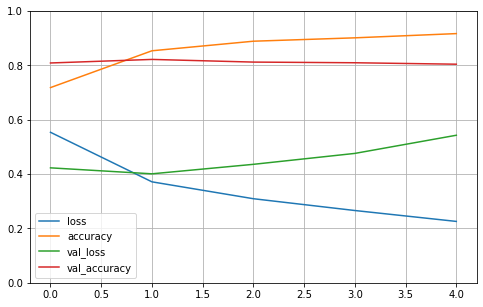

In [96]:
pd.DataFrame(model_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model Improvement

## LSTM

In [97]:
# Modeling
from tensorflow.keras.layers import LSTM

tf.keras.backend.clear_session()
model_lstm = tf.keras.Sequential([
    encoder,
    embedding,
    keras.layers.LSTM(128, return_sequences=True, input_shape=(1,)),
    keras.layers.LSTM(64),
    keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])



model_lstm_hist = model_lstm.fit(train,
                                 epochs=10,
                                 validation_data=(val),
                                 callbacks=[callback]
                                )


Epoch 1/10
458/458 [==============================] - 36s 60ms/step - loss: 0.2490 - accuracy: 0.9047 - val_loss: 0.4459 - val_accuracy: 0.8055
Epoch 2/10
458/458 [==============================] - 27s 59ms/step - loss: 0.1844 - accuracy: 0.9212 - val_loss: 0.5800 - val_accuracy: 0.7891
Epoch 3/10
458/458 [==============================] - 26s 57ms/step - loss: 0.1563 - accuracy: 0.9287 - val_loss: 0.7044 - val_accuracy: 0.7928
Epoch 4/10
458/458 [==============================] - 27s 58ms/step - loss: 0.1398 - accuracy: 0.9330 - val_loss: 0.8169 - val_accuracy: 0.7821


In [98]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 64)          192000    
                                                                 
 lstm (LSTM)                 (None, None, 128)         98816     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 340,289
Trainable params: 340,289
Non-trainable params: 0
__________________________________________________

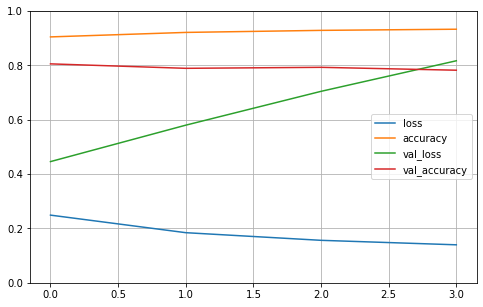

In [99]:
pd.DataFrame(model_lstm_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## GRU

In [100]:
# GRU Model

tf.keras.backend.clear_session()
inputs = tf.keras.layers.Input(shape=(1,), dtype='string')
encod = encoder(inputs)
emb = embedding(encod)
gru = tf.keras.layers.GRU(64)(emb)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(gru)
model_gru = tf.keras.Model(inputs, outputs, name="GRU_model")

# compile model

model_gru.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


model_gru_hist = model_gru.fit(train,
                               epochs=10,
                               validation_data=(val),
                               callbacks=[callback])

Epoch 1/10
458/458 [==============================] - 15s 23ms/step - loss: 0.2234 - accuracy: 0.9179 - val_loss: 0.5181 - val_accuracy: 0.7989
Epoch 2/10
458/458 [==============================] - 10s 22ms/step - loss: 0.1649 - accuracy: 0.9372 - val_loss: 0.6416 - val_accuracy: 0.7993
Epoch 3/10
458/458 [==============================] - 9s 20ms/step - loss: 0.1387 - accuracy: 0.9451 - val_loss: 0.7182 - val_accuracy: 0.7887
Epoch 4/10
458/458 [==============================] - 10s 21ms/step - loss: 0.1265 - accuracy: 0.9473 - val_loss: 0.7716 - val_accuracy: 0.7768


In [101]:
model_gru.summary()

Model: "GRU_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 64)          192000    
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 217,025
Trainable params: 217,025
Non-trainable params: 0
___________________________________________________

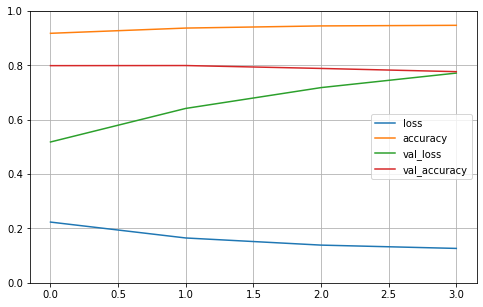

In [102]:
pd.DataFrame(model_gru_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model Evaluation

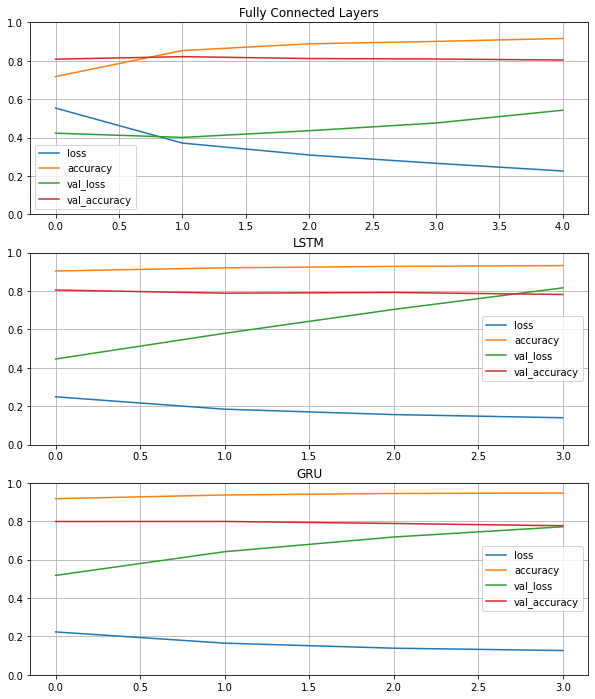

In [103]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 12))
pd.DataFrame(model_hist.history).plot(ax=ax[0])
pd.DataFrame(model_lstm_hist.history).plot(ax=ax[1])
pd.DataFrame(model_gru_hist.history).plot(ax=ax[2])

ax[0].grid(True)
ax[0].set_ylim(0, 1)
ax[0].set_title("Fully Connected Layers")
ax[1].grid(True)
ax[1].set_ylim(0, 1)
ax[1].set_title("LSTM")
ax[2].grid(True)
ax[2].set_ylim(0, 1)
ax[2].set_title("GRU")
plt.show()

Model Analysis

# Model Inference

In [104]:
# inference

new_tweets = [
            "apakah kali ini si bajingan @Dennysiregar7bisa lolos? dia telah memfitnah dgn mengatakan MIRAS budaya suku tertentu? ayo buru dan laporkan si tukang fitnah @Dennysiregar7 #tangkapDennySiregar #tangkapDennySiregar",
            "Aku mencintai permasalahanku, Karena aku tahu yang Memberi ku masalah mencintaiku...",
            "saban hari gagah-gagahan ngehina orang,kodran kadrun,imigran yaman, petantang-petenteng ngehina agama orang,sok paling NKRI..akhirnya kepeleset juga, sekarang kau makan lah tu buah dari sikap sok paten kau ini.."
]


In [105]:
new_tweets =  pd.DataFrame(new_tweets, columns=['word'])
new_tweets

,word
0,apakah kali ini si bajingan @Dennysiregar7bisa...
1,"Aku mencintai permasalahanku, Karena aku tahu ..."
2,"saban hari gagah-gagahan ngehina orang,kodran ..."


In [106]:
new_tweets['word'] = new_tweets['word'].apply(preprocess)
new_tweets['word']

0    kali  sih bajingan lolos   memfitnah   minuman...
1        mencintai permasalahanku      ku  mencintaiku
2    saban  gagah gagahan menghina orang kodran kad...
Name: word, dtype: object

In [107]:
#predict

prediction = model_gru.predict(new_tweets)
prediction.argmax(axis=1)

array([0, 0, 0], dtype=int64)

# Overall Analysis


For this project i make 3 models, they are Fully Connected Layers, using LSTM, using GRU and the result is after modeling we can see that this model is overfit, i try to build some combintaion for at least 2 days, but still al my combination dense to this model is still have an overfit model. so i try to use callback and the model stoped in 4 epoch.

I thought this happened because i have a small amount of data, i think i'm not optimal for preprocessing things, for preprocessing things because i can't understand why Indonesian citizen when typing tweets are very strange. it's very rarely to find tweets which contained a good bahasa vocabulary. 

for example 'Teks: USER Tabayyun sebelum ngomyang..cocot busuk lol dipelihara, memaikan isu SARA kok bangga'
this tweet can be written with a good bahasa, like tabayun sebelum ngomong, cacat busuk kok dipelihara, memakai isu SARA kok bangga, see? this is just one sample. there's so many strange tweet in bahasa.

So in the next project if must make a NLP model, i will search som dataset which have a lot of rows data, after that i MUST to create a file which contain a lot of indonesian alay dictionary to normalize tweet from Indonesian citizen so i can do more optimal preprocessing, if i can do that two things mybe my model is going much better than this

In [108]:
import os

model_version = "01"
model_name = "nlp_model"
model_path = os.path.join(model_name, model_version)
model_path

'nlp_model\\01'

In [109]:
!rm -rf {model_name}

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [110]:
tf.keras.models.save_model(model, model_path)

INFO:tensorflow:Assets written to: nlp_model\01\assets


In [111]:
for root, dirs, files in os.walk(model_name):
    indent = '    ' * root.count(os.sep)
    print('{}{}/'.format(indent, os.path.basename(root)))
    for filename in files:
        print('{}{}'.format(indent + '    ', filename))

nlp_model/
    01/
        keras_metadata.pb
        saved_model.pb
        assets/
        variables/
            variables.data-00000-of-00001
            variables.index


In [112]:
!saved_model_cli show --dir {model_path}

The given SavedModel contains the following tag-sets:
'serve'


2022-01-12 21:14:20.237385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-12 21:14:20.237434: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [113]:
!saved_model_cli show --dir {model_path} --tag_set serve

The given SavedModel MetaGraphDef contains SignatureDefs with the following keys:
SignatureDef key: "__saved_model_init_op"
SignatureDef key: "serving_default"


2022-01-12 21:14:28.450434: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-12 21:14:28.450493: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [114]:
!saved_model_cli show --dir {model_path} --tag_set serve \
                      --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):

2022-01-12 21:14:34.184210: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-12 21:14:34.184295: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



  inputs['text_vectorization_1_input'] tensor_info:
      dtype: DT_STRING
      shape: (-1)
      name: serving_default_text_vectorization_1_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 1)
      name: StatefulPartitionedCall_1:0
Method name is: tensorflow/serving/predict


In [115]:
!saved_model_cli show --dir {model_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:

2022-01-12 21:14:41.280954: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-12 21:14:41.281048: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-12 21:14:48.262626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-12 21:14:48.264145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-01-12 21:14:48.265634: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-01-12 21:14:48.266899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu


  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['text_vectorization_1_input'] tensor_info:
        dtype: DT_STRING
        shape: (-1)
        name: serving_default_text_vectorization_1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_2'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 1)
        name: StatefulPartitionedCall_1:0
  Method name is: tensorflow/serving/predict
